IMPORTS + DATOS

In [162]:
from scipy import stats  
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor



In [29]:
df_lineal = pd.read_csv('Datos/Lineal/Distr.csv',index_col='indice')
df_polinomico = pd.read_csv('Datos/Polinomica/Periodica.csv',index_col='indice')
df_exp = pd.read_csv('Datos/Exp/DRIFT.csv',index_col='indice')
df_log = pd.read_csv('Datos/Log/TEND.csv',index_col='indice')
df_escal = pd.read_csv('Datos/Escalonada/ARMA.csv',index_col='indice')
df_inversa = pd.read_csv('Datos/Prop_inversa/Distr.csv',index_col='indice')

In [3]:
df_condicional =  pd.read_csv('Datos/Condicional/DRIFT-DIST-ARMA.csv',index_col='indice')
df_funcional =  pd.read_csv('Datos/Funcional/DRIFT-DIST.csv',index_col='indice')
df_interaccion =  pd.read_csv('Datos/Interaccion/PER-ARMA-TEND.csv',index_col='indice')
df_multivariante =  pd.read_csv('Datos/Multivariante/DRIFT-DIST-ARMA.csv',index_col='indice')

LINEAR REGRESSION:

In [117]:
def entrenar_linearReg(df,columns_predict):
    modelo = LinearRegression()
    l = int(df.shape[0]*0.8)
    modelo.fit(X=df[:l].drop(columns=columns_predict),y=df[columns_predict][:l])
    df_pred = df[l:].copy()
    df_pred['Predicciones'] = modelo.predict(df[l:].drop(columns=columns_predict))
    fig, ax = plt.subplots(figsize=(9, 3))
    df_pred[columns_predict].plot(ax=ax,label='Valores reales')
    df_pred['Predicciones'].plot(ax=ax,label='Predicción')

    ax.set_xlabel('Tiempo')
    ax.set_ylabel(columns_predict)

    plt.legend()
    plt.show()
    
    mse = mean_squared_error(df_pred['Predicciones'].values,df_pred[columns_predict].values)
    
    print("Error cuadratico medio: ", mse)

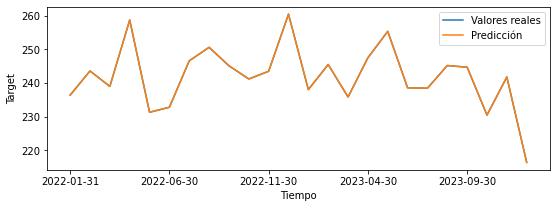

Error cuadratico medio:  6.29405820912338e-27


In [118]:
entrenar_linearReg(df_lineal,'Target')

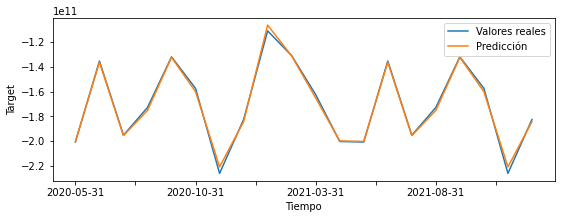

Error cuadratico medio:  5.85527469982821e+18


In [119]:
entrenar_linearReg(df_polinomico,'Target')

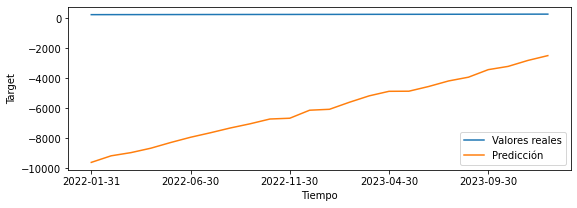

Error cuadratico medio:  44142984.527969055


In [120]:
entrenar_linearReg(df_exp,'Target')

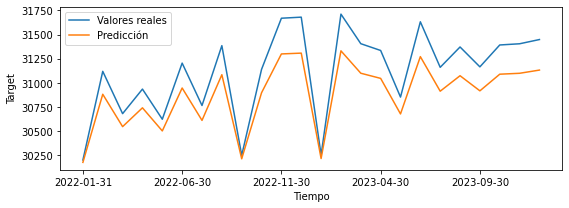

Error cuadratico medio:  67619.16156123632


In [121]:
entrenar_linearReg(df_escal,'Target')

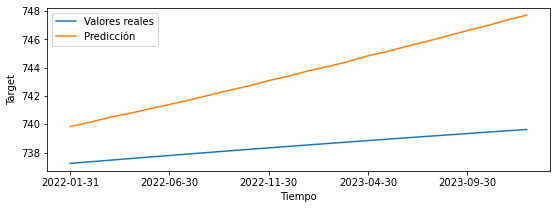

Error cuadratico medio:  29.611773913928996


In [122]:
entrenar_linearReg(df_log,'Target')

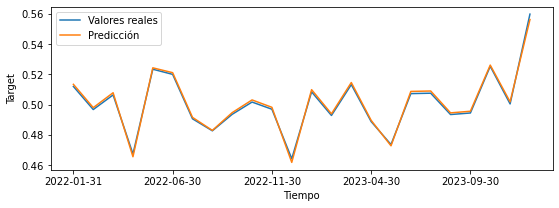

Error cuadratico medio:  2.1421825384946647e-06


In [123]:
entrenar_linearReg(df_inversa,'Target')

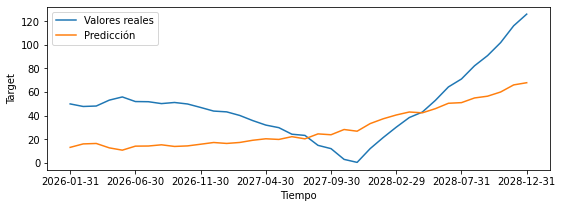

Error cuadratico medio:  832.0855309968456


In [124]:
entrenar_linearReg(df_condicional,'Target')

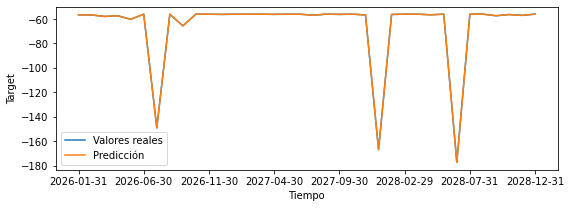

Error cuadratico medio:  3.262027494300575e-27


In [125]:
entrenar_linearReg(df_funcional,'Target')

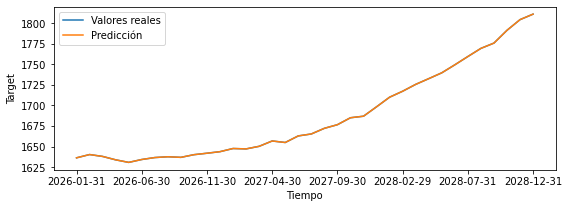

Error cuadratico medio:  2.1541161785235097e-26


In [126]:
entrenar_linearReg(df_multivariante,'Target')

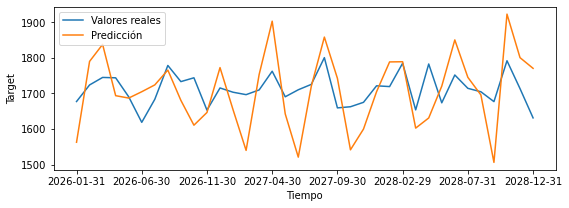

Error cuadratico medio:  8207.072799940606


In [127]:
entrenar_linearReg(df_interaccion,'Target')

ARBOLES DE DECISIÓN:

In [ ]:
def entrenar_TreeReg(df,columns_predict):
    
    l = int(df.shape[0]*0.8)
    X_train=df[:l].drop(columns=columns_predict)
    y_train=df[columns_predict][:l]
    
    modelo = DecisionTreeRegressor(random_state=42)
    param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
    }  
    grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    optimized_model = DecisionTreeRegressor(**best_params, random_state=42) 
    optimized_model.fit(X_train, y_train)
    
    df_pred = df[l:].copy()
    df_pred['Predicciones'] = optimized_model.predict(df[l:].drop(columns=columns_predict))
    fig, ax = plt.subplots(figsize=(9, 3))
    df_pred[columns_predict].plot(ax=ax,label='Valores reales')
    df_pred['Predicciones'].plot(ax=ax,label='Predicción')
    ax.set_xlabel('Tiempo')
    ax.set_ylabel(columns_predict)

    plt.legend()
    plt.show()
    
    mse = mean_squared_error(df_pred['Predicciones'].values,df_pred[columns_predict].values)
    
    print("Error cuadratico medio: ", mse)

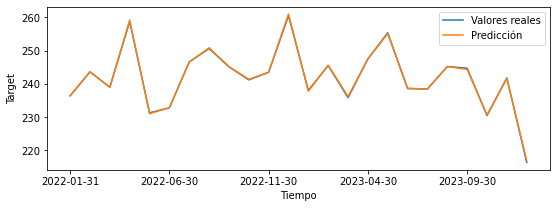

Error cuadratico medio:  0.05629793468503696


In [147]:
entrenar_TreeReg(df_lineal,'Target')

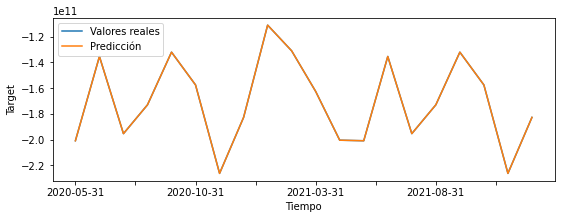

Error cuadratico medio:  1.7462298274040222e-10


In [148]:
entrenar_TreeReg(df_polinomico,'Target')

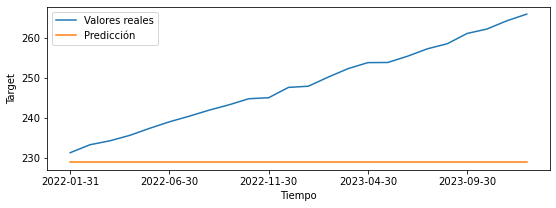

Error cuadratico medio:  476.47432142268514


In [149]:
entrenar_TreeReg(df_exp,'Target')

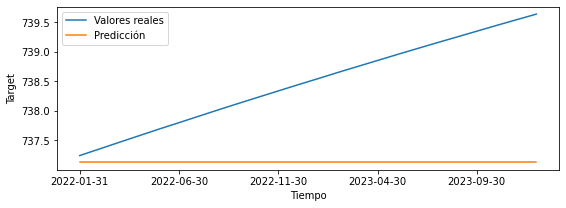

Error cuadratico medio:  2.338405409745737


In [150]:
entrenar_TreeReg(df_log,'Target')

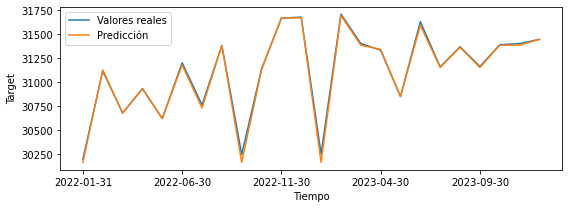

Error cuadratico medio:  821.8404643748077


In [151]:
entrenar_TreeReg(df_escal,'Target')

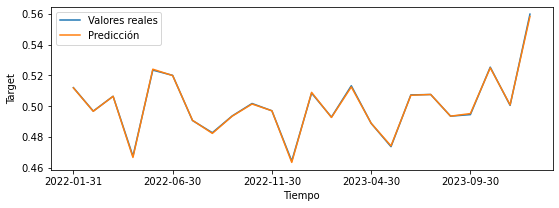

Error cuadratico medio:  2.6279375748164915e-07


In [152]:
entrenar_TreeReg(df_inversa,'Target')

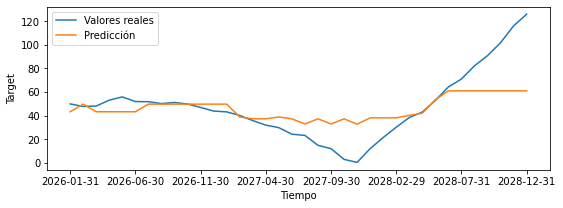

Error cuadratico medio:  431.62713067883124


In [153]:
entrenar_TreeReg(df_condicional,'Target')

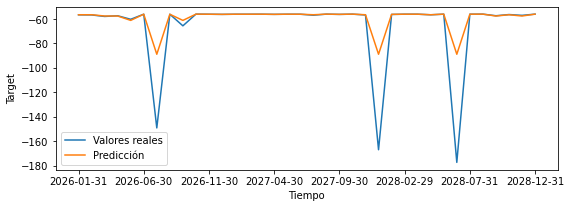

Error cuadratico medio:  488.2246517467633


In [154]:
entrenar_TreeReg(df_funcional,'Target')

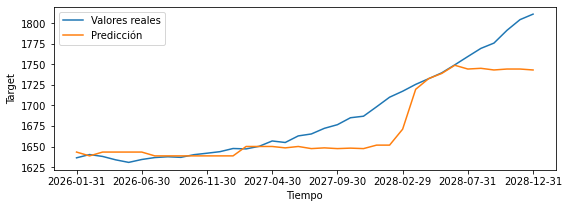

Error cuadratico medio:  707.8209192986259


In [155]:
entrenar_TreeReg(df_multivariante,'Target')

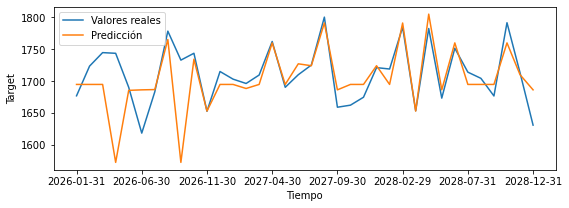

Error cuadratico medio:  2027.020655118918


In [156]:
entrenar_TreeReg(df_interaccion,'Target')

In [164]:
def entrenar_RandomForestReg(df,columns_predict):
    
    l = int(df.shape[0]*0.8)
    X_train=df[:l].drop(columns=columns_predict)
    y_train=df[columns_predict][:l]
    
    modelo = RandomForestRegressor(random_state=42)
    param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    } 
    grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    optimized_model = RandomForestRegressor(**best_params, random_state=42) 
    optimized_model.fit(X_train, y_train)
    
    df_pred = df[l:].copy()
    df_pred['Predicciones'] = optimized_model.predict(df[l:].drop(columns=columns_predict))
    fig, ax = plt.subplots(figsize=(9, 3))
    df_pred[columns_predict].plot(ax=ax,label='Valores reales')
    df_pred['Predicciones'].plot(ax=ax,label='Predicción')
    ax.set_xlabel('Tiempo')
    ax.set_ylabel(columns_predict)

    plt.legend()
    plt.show()
    
    mse = mean_squared_error(df_pred['Predicciones'].values,df_pred[columns_predict].values)
    
    print("Error cuadratico medio: ", mse)

/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
155 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

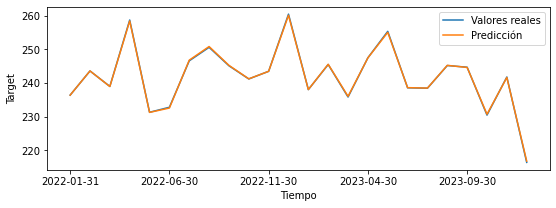

Error cuadratico medio:  0.03200112390802536


In [165]:
entrenar_RandomForestReg(df_lineal,'Target')

/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
138 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

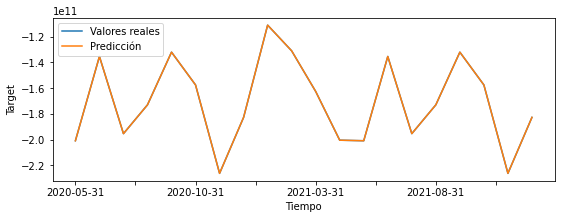

Error cuadratico medio:  353334281885382.06


In [166]:
entrenar_RandomForestReg(df_polinomico,'Target')

/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
179 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

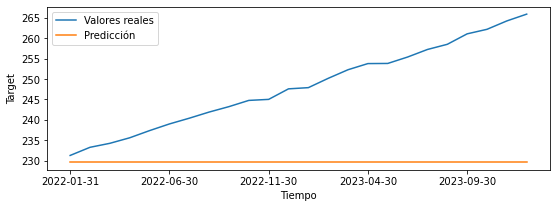

Error cuadratico medio:  449.17436051940035


In [167]:
entrenar_RandomForestReg(df_exp,'Target')

/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
203 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

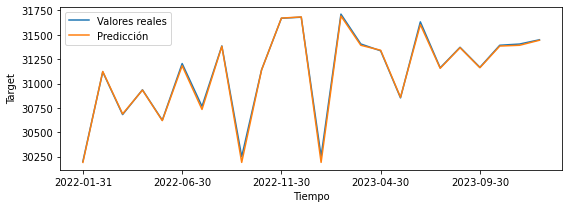

Error cuadratico medio:  441.6385948559905


In [168]:
entrenar_RandomForestReg(df_escal,'Target')

/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
219 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

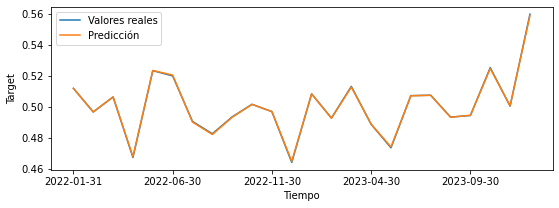

Error cuadratico medio:  1.4360703418339112e-07


In [169]:
entrenar_RandomForestReg(df_inversa,'Target')

/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

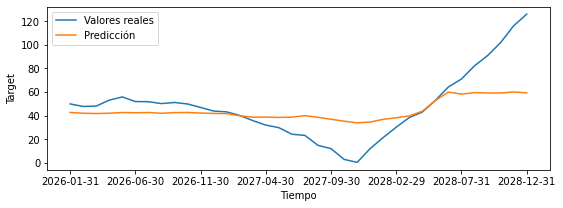

Error cuadratico medio:  466.76736262070324


In [170]:
entrenar_RandomForestReg(df_condicional,'Target')

/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
268 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

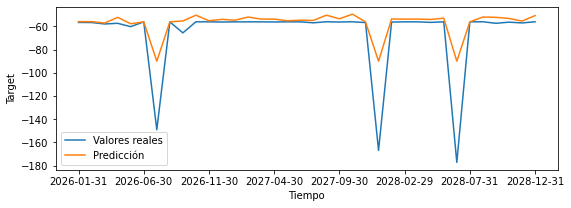

Error cuadratico medio:  484.5780316168461


In [171]:
entrenar_RandomForestReg(df_funcional,'Target')

/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
343 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

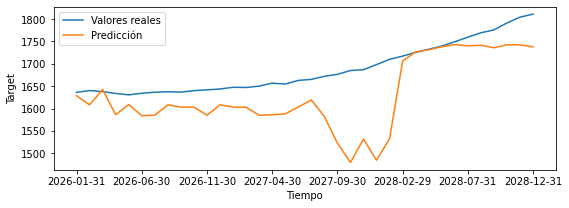

Error cuadratico medio:  6365.659183351978


In [172]:
entrenar_RandomForestReg(df_multivariante,'Target')

/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
204 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/khaosdev/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

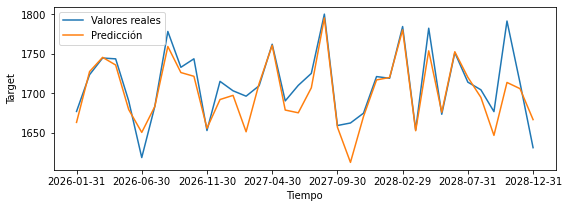

Error cuadratico medio:  511.1969502915651


In [173]:
entrenar_RandomForestReg(df_interaccion,'Target')